In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

# Monte Carlo exponential and uniform separaterly

In [45]:
# exponential distribution
def M_CDF(mu):
    return 1-np.exp(-mu) # integrate M(mu) from 0 to mu bc mu needs to be positive (polar coords)

def M_inverseCDF(r):
    return -np.log(np.abs(1-r))

# uniform distribution
def Theta_CDF(theta):
    return theta/(2*np.pi)

def Theta_inverseCDF(r):
    return r*2*np.pi

In [46]:
Nsamp = 1e7
trials = range(int(Nsamp))

values_mu = np.zeros(int(Nsamp))
values_theta = np.zeros(int(Nsamp))

# Generate mu and theta separately
for i in trials:
    ro = r.random() # value between 0 and 1
    values_mu[i] = M_inverseCDF(ro) # store randomly generated mu's
    values_theta[i] = Theta_inverseCDF(ro) # store randomly generated theta's

/tmp/ipykernel_5922/1928946321.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.abs(1-r))


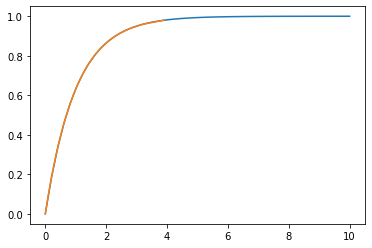

In [47]:
# debugging

test = np.linspace(0, 10)
plt.plot(test, M_CDF(test))

test_r = np.linspace(0, 1)
plt.plot(M_inverseCDF(test_r), test_r)

# Convert back to x and y

In [48]:
# Convert to polar coordinates (mu --> r)

sigma = 1 # arbitrary

values_r = np.sqrt(2*sigma**2 * values_mu)

In [49]:
# Convert to cartesian

x = values_r*np.cos(values_theta)
y = values_r*np.sin(values_theta)

print("mean", np.mean(x))
print("std", np.std(x))

mean 0.05644049933876519
std 1.0561386274215143


# Plotting

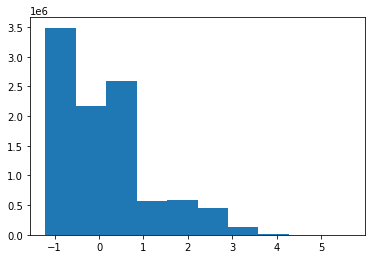

In [50]:
hist = plt.hist(x)
plt.show()

counts = hist[0]
bin_edges = hist[1]

bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]

# normalize
norm = Nsamp*bin_widths
counts /= norm

In [ ]:
# Verify quantitatively that your random number generator works.